In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [4]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


### Function for generating data base on input degree

In [5]:
def polynomial_dataframe(feature, degree):
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    
    if degree > 1:
        for power in range(2, degree +1):
            name = 'power_' + str(power)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x: np.power(x, power))
    return poly_dataframe

In [6]:
poly_data = polynomial_dataframe(sales['sqft_living'], 15)

### Ridge Regression Model with L2 penalty of 1.5e-5

In [7]:
my_features = poly_data.columns.values.tolist()
poly_data['price'] = sales['price']

X = poly_data[my_features]
y = poly_data['price']

In [8]:
l2_small_penalty = 1.5e-5
model = Ridge(alpha= l2_small_penalty, normalize= True ).fit(X, y)

### What's the learned calue for the coefficient of feature power_1?

In [9]:
model.coef_[0]

124.87330648344516

### Splitting data set into four subsets

In [10]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [11]:
l2_small_penalty = 1e-9

### Model 1

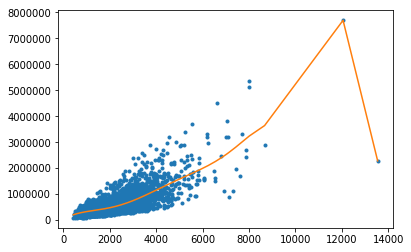

In [12]:
poly_data1 = polynomial_dataframe(set_1['sqft_living'], 15)
X1 = poly_data1[my_features].values.reshape(-1,15)
y1 = set_1['price']

model1 = Ridge(alpha= l2_small_penalty, normalize= True).fit(X1, y1)

plt.plot(poly_data1['power_1'], set_1['price'], '.',
        poly_data1['power_1'], model1.predict(poly_data1[my_features].values.reshape(-1, 15)), '-')

### Model 2

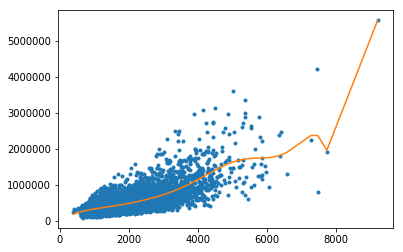

In [13]:
poly_data2 = polynomial_dataframe(set_2['sqft_living'], 15)
X2 = poly_data2[my_features].values.reshape(-1,15)
y2 = set_2['price']

model2 = Ridge(alpha= l2_small_penalty, normalize= True).fit(X2, y2)

plt.plot(poly_data2['power_1'], set_2['price'], '.',
        poly_data2['power_1'], model2.predict(poly_data2[my_features].values.reshape(-1, 15)), '-')

### Model 3

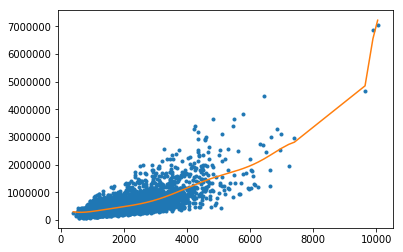

In [14]:
poly_data3 = polynomial_dataframe(set_3['sqft_living'], 15)
X3 = poly_data3[my_features].values.reshape(-1,15)
y3 = set_3['price']

model3 = Ridge(alpha= l2_small_penalty, normalize= True).fit(X3, y3)

plt.plot(poly_data3['power_1'], set_3['price'], '.',
        poly_data3['power_1'], model3.predict(poly_data3[my_features].values.reshape(-1, 15)), '-')

### Model 4

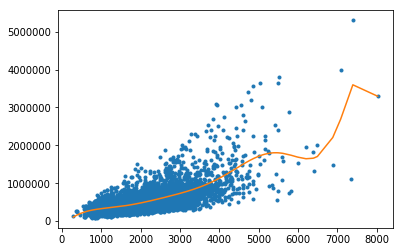

In [15]:
poly_data4 = polynomial_dataframe(set_4['sqft_living'], 15)
X4 = poly_data4[my_features].values.reshape(-1,15)
y4 = set_4['price']

model4 = Ridge(alpha= l2_small_penalty, normalize= True).fit(X4, y4)

plt.plot(poly_data4['power_1'], set_4['price'], '.',
        poly_data4['power_1'], model4.predict(poly_data4[my_features].values.reshape(-1, 15)), '-')

### For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?

In [16]:
model_list = [model1, model2, model3, model4]

for i in model_list:
    print(i.coef_[0])

544.6693985254344
859.3626431654823
-755.3959645499737
1119.4457003710559


### Using large penalty and running four models again

In [17]:
l2_large_penalty=1.23e2

### Model 1

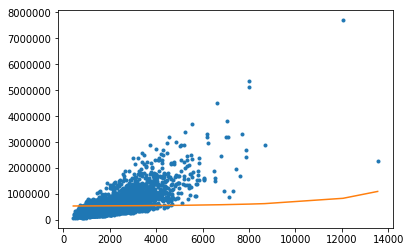

In [18]:
model1_large = Ridge(alpha= l2_large_penalty, normalize= True).fit(X1, y1)

plt.plot(poly_data1['power_1'], set_1['price'], '.',
        poly_data1['power_1'], model1_large.predict(poly_data1[my_features].values.reshape(-1, 15)), '-')

### Model 2

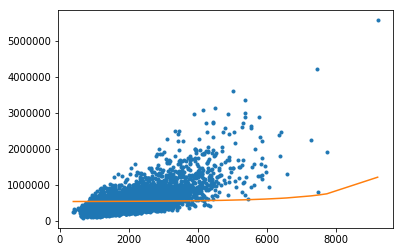

In [19]:
model2_large = Ridge(alpha= l2_large_penalty, normalize= True).fit(X2, y2)

plt.plot(poly_data2['power_1'], set_2['price'], '.',
        poly_data2['power_1'], model2_large.predict(poly_data2[my_features].values.reshape(-1, 15)), '-')

### Model 3

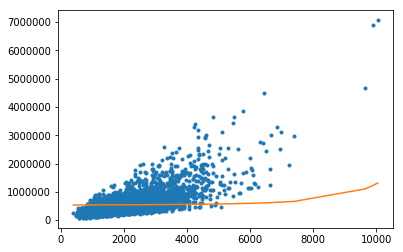

In [20]:
model3_large = Ridge(alpha= l2_large_penalty, normalize= True).fit(X3, y3)

plt.plot(poly_data3['power_1'], set_3['price'], '.',
        poly_data3['power_1'], model3_large.predict(poly_data3[my_features].values.reshape(-1, 15)), '-')

### Model 4

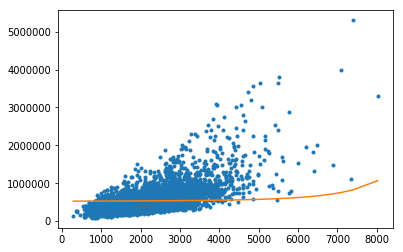

In [21]:
model4_large = Ridge(alpha= l2_large_penalty, normalize= True).fit(X4, y4)

plt.plot(poly_data4['power_1'], set_4['price'], '.',
        poly_data4['power_1'], model4_large.predict(poly_data4[my_features].values.reshape(-1, 15)), '-')

### For the models learned with regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?

In [22]:
model_list = [model1_large, model2_large, model3_large, model4_large]

for i in model_list:
    print(i.coef_[0])

2.328068029579325
2.097569027778555
2.289062581189205
2.085961940919307


### Cross-Validation

In [23]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [24]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n = len(data)
    
    for i in range(k):
        rss = 0
        start = math.floor((n*i)/k)
        end = math.floor((n*(i+1))/k-1)   
        validation_set = data[start: end + 1]
        training_set = data[0: start].append(data[end + 1:n])
        y_training = output[0: start].append(output[end + 1:n])
        y_validation = output[start: end + 1]
        
        model = Ridge(alpha = l2_penalty, normalize= True).fit(training_set, y_training)
        prediction = model.predict(validation_set)
        
        #RSS
        rss = np.sum(np.square(y_validation - prediction))
    valid_error = rss / k
    return valid_error

In [25]:
poly_data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
l2_penalty = np.logspace(3, 9, num = 13)

rss_list = []
for l2 in l2_penalty:
    rss_list.append(k_fold_cross_validation(10, l2, poly_data, train_valid_shuffled['price']))
    

###  What is the best value for the L2 penalty according to 10-fold validation?

In [26]:
rss_list.index(min(rss_list))

0

In [27]:
l2_penality_fianl = l2_penalty[0]

### What is the RSS on the TEST data of the model you learn with this L2 penalty?

In [28]:
poly_data_final = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
X = poly_data_final[my_features].values.reshape(-1,15)
y = train_valid_shuffled['price']

model_f = Ridge(alpha= l2_penality_fianl, normalize= True).fit(X, y)


In [29]:
poly_data_test = polynomial_dataframe(test['sqft_living'], 15)
prediction = model_f.predict(poly_data_test[my_features].values.reshape(-1, 15))

In [30]:
RSS = np.sum(np.square(test['price'] - prediction))
RSS

283856861224150.9

# Gradient Descent

In [31]:
def get_numpy_data(train_data, features, output):
    train_data['constant'] = 1
    features = ['constant'] + features
    feature_matrix = train_data[features].values
    
    output_array = np.array(train_data[output])    
    return feature_matrix, output_array

In [32]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)    
    return predictions

In [33]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    
    if feature_is_constant == True:
        derivative = 2 * np.dot(errors, feature) 
    else:
        derivative = 2 * np.dot(errors, feature) + 2 * np.dot(l2_penalty, weight) 
    return derivative

### Test function feature_derivative_ridge

In [34]:
example_features, example_output = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output

print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors*example_features[:,1])*2+20.)
print()

print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2.)

-56554166815950.0
-56554166815950.0

-22446749330.0
-22446749330.0


### Function for Ridge Regression Gradient Descent

In [69]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations = 100):
    weights = np.array(initial_weights)
    
    while max_iterations > 0:
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        
        for i in range(len(weights)):
            if i == 0:
                feature_is_constant = True
            else:
                feature_is_constant = False
            
            derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, feature_is_constant)
            weights[i] = weights[i] - (step_size * derivative) 
        
        max_iterations -= 1
    return weights

### Model 1

- features : 'sqft_living'
- output: 'price'

In [74]:
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

In [75]:
simple_features = ['sqft_living']
my_output = 'price'
simple_feature_matrix, output = get_numpy_data(train_data, simple_features, my_output)
simple_test_feature_matrix, test_output = get_numpy_data(test_data, simple_features, my_output)

### Ridge Regression -  no regularization and one input feature

- step_size = 1e-12
- max_iterations = 1000
- initial_weights = all zeros

In [76]:
step_size = 1e-12
initial_weights = np.array([0., 0.])
max_iterations = 1000

In [77]:
l2_no_penalty = 0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                              initial_weights, step_size, 
                                                              l2_no_penalty, max_iterations)
simple_weights_0_penalty

array([-1.63113515e-01,  2.63024369e+02])

In [78]:
l2_large_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                              initial_weights, step_size, 
                                                              l2_large_penalty, max_iterations)

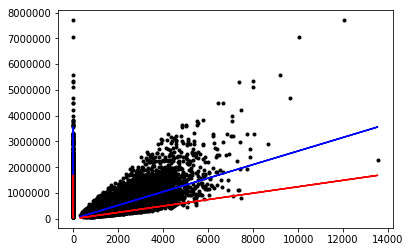

In [79]:
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

### What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? 

In [80]:
round(simple_weights_0_penalty[1], 1)

263.0

### What about the one with high regularization?

In [81]:
round(simple_weights_high_penalty[1], 1)

124.6

### The line with no regularization is much steeper than the line with regularization

### Compute RSS on test data for as the following three sets of weights:
- The initial weights (all zeros)
- The weights learned with no regularization
- The weights learned with high regularization

In [82]:
prediction_initial_weights = predict_output(simple_test_feature_matrix, initial_weights)
residual_initial_weights = test_output - prediction_initial_weights
rss_initial_weights = (residual_initial_weights ** 2).sum()
rss_initial_weights

1784273286136298.0

In [83]:
prediction_no_regularization = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
residual_no_regularization= test_output - prediction_no_regularization
rss_no_regularization = (residual_no_regularization ** 2).sum()
rss_no_regularization

275723632153607.44

In [84]:
prediction_high_regularization = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
residual_high_regularization= test_output - prediction_high_regularization
rss_high_regularization = (residual_high_regularization ** 2).sum()
rss_high_regularization

694642101489902.5

### Multilple Regression with L2 Penalty

In [85]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

- initial_weights = all zeros
- step size = 1e-12
- max_iterations = 1000

In [86]:
initial_weights = np.array([0., 0., 0.])
step_size = 1e-12
l2_no_penalty = 0
l2_large_penalty = 1e11
max_iterations = 1000

In [87]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                              initial_weights, step_size, 
                                                              l2_no_penalty, max_iterations)

In [88]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                              initial_weights, step_size, 
                                                              l2_large_penalty, max_iterations)

### What is the value of the coefficient for ‘sqft_living’ that you learned with no regularization

In [89]:
round(multiple_weights_0_penalty[1],1)

243.1

### What about the one with high regularization?

In [90]:
round(multiple_weights_high_penalty[1], 1)

91.5

### Compute RSS on test data for as the following three sets of weights:
- The initial weights (all zeros)
- The weights learned with no regularization
- The weights learned with high regularization

In [91]:
prediction_initial_weights_mul = predict_output(test_feature_matrix, initial_weights)
residual_initial_weights_mul = test_output - prediction_initial_weights_mul
rss_initial_weights_mul = (residual_initial_weights_mul ** 2).sum()
rss_initial_weights_mul

1784273286136298.0

In [92]:
prediction_no_regularization_mul = predict_output(test_feature_matrix, multiple_weights_0_penalty)
residual_no_regularization_mul = test_output - prediction_no_regularization_mul
rss_no_regularization_mul = (residual_no_regularization_mul ** 2).sum()
rss_no_regularization_mul

274067615918575.56

In [93]:
prediction_high_regularization_mul = predict_output(test_feature_matrix, multiple_weights_high_penalty)
residual_high_regularization_mul = test_output - prediction_high_regularization_mul
rss_high_regularization_mul = (residual_high_regularization_mul ** 2).sum()
rss_high_regularization_mul

500404800500841.75

###  What's the error in predicting the price of the first house in the test set using the weights learned with no regularization? 

In [94]:
print(test_output[0] - prediction_no_regularization_mul[0])

-77465.47605823533


### What about with high regularization?

In [95]:
print(test_output[0] - prediction_high_regularization_mul[0])

39546.46967805945
